**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#%load_ext pycodestyle_magic

In [88]:
def numpy_dist(X, Y):
    x_dist = (X ** 2).sum(axis=1)
    y_dist = (Y ** 2).sum(axis=1)
    xy_dist = X.dot(Y.T)
    dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
    return np.sqrt(dist)


def mode(a, axis=0):
    scores = np.unique(np.ravel(a))
    testshape = list(a.shape)
    testshape[axis] = 1
    oldmostfreq = np.zeros(testshape)
    oldcounts = np.zeros(testshape)

    for score in scores:
        template = (a == score)
        counts = np.expand_dims(np.sum(template, axis), axis)
        mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
        oldcounts = np.maximum(counts, oldcounts)
        oldmostfreq = mostfrequent

    return mostfrequent, oldcounts


class MyKNeighborsClassifier(
    NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin
):

    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X.copy().astype(float)
        self.y_train = y.copy().astype(int)
        return self

    def predict(self, X_test):
        X_test = np.array(X_test, dtype=float)
        dists = numpy_dist(self.X_train, X_test)
        idx = np.argpartition(dists, self.n_neighbors, axis=0)[:self.n_neighbors]
        nearest_dists = np.take(self.y_train, idx)
        return mode(nearest_dists, axis=0)[0]

    def predict_proba(self, X):
        dists = numpy_dist(self.X_train, X_test)
        idx = np.argpartition(dists, self.n_neighbors, axis=0)[:self.n_neighbors]
        nearest_dists = np.take(self.y_train, idx)
        prob = np.zeros((nearest_dists.shape[1], np.unique(y_train).shape[0]))
        near = np.transpose(nearest_dists)
        for i in range(nearest_dists.shape[1]):
            c = np.unique(near[i], return_counts=True)
            count = 0
            for j in c[0]:
                prob[i][j] = c[1][count]/self.n_neighbors
                count += 1
        return prob

    def score(self, X, y):
        return np.mean(self.predict(X) == y)


**IRIS**

In [76]:
iris = datasets.load_iris()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [78]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [79]:
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [80]:
%time clf.fit(X_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [81]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(n_neighbors=2)

In [82]:
%time clf.predict(X_test)

Wall time: 1 ms


array([2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0])

In [83]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([[2., 2., 0., 2., 0., 1., 1., 2., 0., 1., 0., 2., 1., 1., 0.]])

In [84]:
%time clf.predict_proba(X_test)

Wall time: 1 ms


array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [85]:
%time my_clf.predict_proba(X_test)

Wall time: 2 ms


array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [86]:
clf.score(X_test, y_test)

0.8666666666666667

In [87]:
my_clf.score(X_test, y_test)

0.8666666666666667

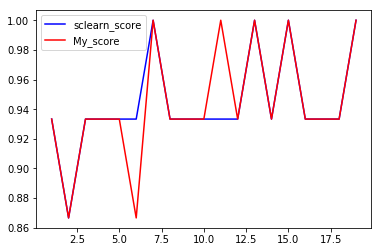

In [95]:
# Задание 3
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
n=20
k=range(1,n)
c=np.zeros(n-1)
mc=np.zeros(n-1)
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    mc[i-1]=my_clf.score(X_test, y_test)
    #print mc
    c[i-1]=clf.score(X_test, y_test)
plt.plot(k, c, color='blue', label='sclearn_score')
plt.plot(k, mc, color='red', label='My_score')
plt.legend()

In [ ]:
#При 6 соседях будет наилучшая работа алгоритма

**MNIST**

In [18]:
mnist = fetch_mldata('MNIST original')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [20]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [49]:
%time clf.fit(X_train, y_train)

Wall time: 1min 12s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

Wall time: 193 ms


MyKNeighborsClassifier(n_neighbors=2)

In [50]:
%time clf.predict(X_test)

Wall time: 13min 6s


array([3., 9., 8., ..., 6., 9., 9.])

In [22]:
%time my_clf.predict(X_test)

KeyboardInterrupt: 

In [23]:
%time clf.predict_proba(X_test)

NotFittedError: Must fit neighbors before querying.

In [ ]:
%time my_clf.predict_proba(X_test)

In [124]:
clf.score(X_test, y_test)

0.9333333333333333

In [125]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 5

In [ ]:
# seaborn
#библиотека визуализации статистической графики, построена на основе matplotlib.
#обеспечивает высокоуровневый интерфейс для рисования статистической графики.

# matplotlib
# библиотека для визуализации данных, 2D и 3D графики

# train_test_split
#разбивает массивы или матрицы на случайные train и test подмножества

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
#класс, позволяет последовательно применять список преобразований и конечную оценку.
#Промежуточные шаги Pipeline должны быть «преобразованы», то есть они должны внедрять методы подгонки и преобразования.

# StandardScaler (from sklearn.preprocessing import StandardScaler)
#Стандартизация объектов путем удаления среднего значения и масштабирования до дисперсии единиц измерения

# ClassifierMixin
#Mixin class для всех classifiers
#расширяет основной класс

# NeighborsBase базовый класс. от него наследуются все классы-классификаторы KNN

# KNeighborsMixin
#класс, унаследованный от NeighborsBase. В нем добавлены методы kneighbors и kneighbors_graph. 
#Они находят к ближайших соседей и матрицу связей/расстояния между точками

# SupervisedIntegerMixin
#Mixin. добавлен метод fit, обучающий классификатор